# **Airbnb in European cities**

#### *Assignment 4 - Group 5 - Farmand Bazdiditehrani*

#### ___________________________________________________________

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Practice your data wrangling
* **Importing dataset from google sheet**
* **Creating new columns for City, Country, & DayType**

In [2]:
doc_id = "1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY"
sheet_names = ["amsterdam_weekdays", "amsterdam_weekends", "athens_weekdays", "athens_weekends", "berlin_weekends", 
               "barcelona_weekdays", "barcelona_weekends", "berlin_weekdays", "budapest_weekdays", 
               "budapest_weekends", "lisbon_weekdays", "lisbon_weekends", "london_weekdays", 
               "london_weekends", "paris_weekdays", "paris_weekends", "rome_weekdays", 
               "rome_weekends", "vienna_weekdays", "vienna_weekends"]
city_country_map = {
    "amsterdam": "Netherlands",
    "athens": "Greece",
    "berlin": "Germany",
    "barcelona": "Spain",
    "budapest": "Hungary",
    "lisbon": "Portugal",
    "london": "United Kingdom",
    "paris": "France",
    "rome": "Italy",
    "vienna": "Austria"
}
dataframes = []
for sheet_name in sheet_names:
    url = f"https://docs.google.com/spreadsheets/d/{doc_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    df = pd.read_csv(url)
    city, day_type = sheet_name.split("_")
    df['City'] = city.capitalize()  
    df['Country'] = city_country_map.get(city, "Unknown")  
    df['DayType'] = "Weekday" if day_type == "weekdays" else "Weekend"
    dataframes.append(df)

* **Merging all the sheets into a single dataframe**

In [3]:
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv("asda_homework.csv", index=False)
combined_df.head(1)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Country,DayType
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.53938,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekday


* **Changing the column name from realSum to Price**

In [4]:
combined_df = combined_df.rename(columns={'realSum': 'Price'})

In [5]:
combined_df.head(1)

,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Country,DayType
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.53938,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekday


* **Droping the extra Unnamed column**

In [6]:
combined_df = combined_df.drop(columns=['Unnamed: 0'])
combined_df.head(1)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Country,DayType
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,2.53938,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekday


### For Advanced
* **1st Question is omitted**
* **Instead of dummy variables, create a column where one can know if the host of the listing has only one, two, four, and more than four listings***

In [7]:
combined_df['no_of_listings'] = combined_df.apply(lambda row: '1' if row['multi'] == 0 and row['biz'] == 0 
    else '2-4' if row['multi'] == 1 and row['biz'] == 0 
    else '>4' if row['multi'] == 0 and row['biz'] == 1 
    else 'unknown', axis=1)
combined_df = combined_df.drop(columns=['multi', 'biz'])
column_order = list(combined_df.columns)
insert_position = column_order.index('host_is_superhost') + 1  # Position after 'host_is_superhost'
column_order.insert(insert_position, column_order.pop(column_order.index('no_of_listings'))) # The place of column will be same as multi & biz
combined_df = combined_df[column_order]
combined_df.head(3)

,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,no_of_listings,cleanliness_rating,guest_satisfaction_overall,bedrooms,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,City,Country,DayType
0,194.033698,Private room,False,True,2,False,2-4,10,93,1,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,Netherlands,Weekday
1,344.245776,Private room,False,True,4,False,1,8,85,1,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,Netherlands,Weekday
2,264.101422,Private room,False,True,2,False,>4,9,87,1,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,Netherlands,Weekday


### Exploratory Questions

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  bool   
 6   no_of_listings              51707 non-null  object 
 7   cleanliness_rating          51707 non-null  int64  
 8   guest_satisfaction_overall  51707 non-null  int64  
 9   bedrooms                    51707 non-null  int64  
 10  dist                        51707 non-null  float64
 11  metro_dist                  51707 non-null  float64
 12  attr_index                  51707 non-null  float64
 13  attr_index_norm             517

In [9]:
combined_df.describe()

,Price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694286,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450280,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


#### 1. How many listings are in each city in total and also per type of day?

In [10]:
total_listings_per_city = combined_df.groupby('City').size().reset_index(name='Total_Listings')
listings_per_city_and_daytype = combined_df.groupby(['City', 'DayType']).size().reset_index(name='Listings_Per_DayType')
display(total_listings_per_city)
display(listings_per_city_and_daytype)

,City,Total_Listings
0,Amsterdam,2080
1,Athens,5280
2,Barcelona,2833
3,Berlin,2484
4,Budapest,4022
5,Lisbon,5763
6,London,9993
7,Paris,6688
8,Rome,9027
9,Vienna,3537


,City,DayType,Listings_Per_DayType
0,Amsterdam,Weekday,1103
1,Amsterdam,Weekend,977
2,Athens,Weekday,2653
3,Athens,Weekend,2627
4,Barcelona,Weekday,1555
5,Barcelona,Weekend,1278
6,Berlin,Weekday,1284
7,Berlin,Weekend,1200
8,Budapest,Weekday,2074
9,Budapest,Weekend,1948


#### 2. Which city has the biggest proportion of superhosts?

In [11]:
from IPython.display import display
city_superhost_data = (combined_df.groupby('City').apply(lambda x: (x['host_is_superhost'] == True).mean()).reset_index(name='Superhost_Proportion'))
city_with_highest_superhosts = city_superhost_data.loc[city_superhost_data['Superhost_Proportion'].idxmax()]
display(city_superhost_data)
display(city_with_highest_superhosts)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_45252\1919766885.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  city_superhost_data = (combined_df.groupby('City').apply(lambda x: (x['host_is_superhost'] == True).mean()).reset_index(name='Superhost_Proportion'))


,City,Superhost_Proportion
0,Amsterdam,0.284135
1,Athens,0.428598
2,Barcelona,0.181433
3,Berlin,0.257246
4,Budapest,0.378916
5,Lisbon,0.213951
6,London,0.157410
7,Paris,0.140700
8,Rome,0.326687
9,Vienna,0.284139


City                      Athens
Superhost_Proportion    0.428598
Name: 1, dtype: object

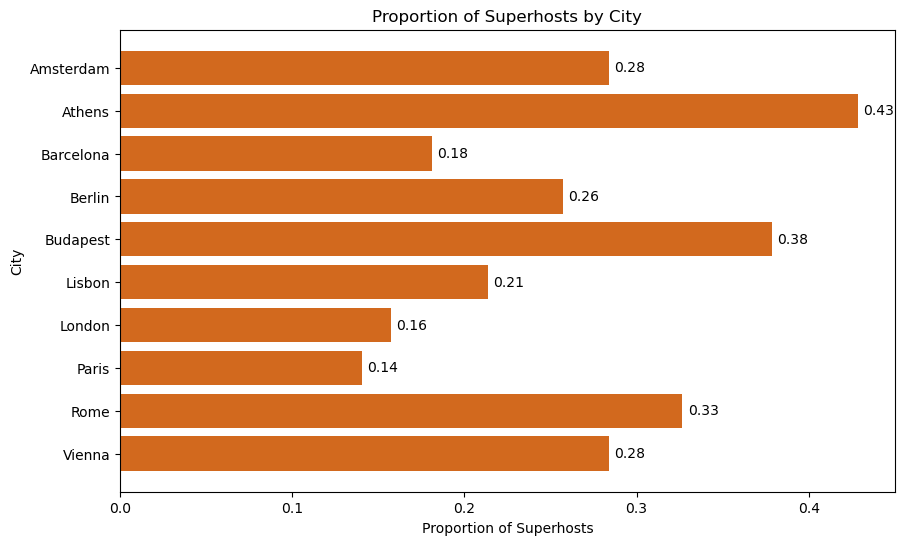

In [12]:
plt.figure(figsize=(10, 6))
bars = plt.barh(city_superhost_data['City'], city_superhost_data['Superhost_Proportion'], color='chocolate')
plt.ylabel('City')
plt.xlabel('Proportion of Superhosts')
plt.title('Proportion of Superhosts by City')
plt.gca().invert_yaxis()  

for bar, proportion in zip(bars, city_superhost_data['Superhost_Proportion']):
    plt.text(bar.get_width() + 0.003, bar.get_y() + bar.get_height()/2, f"{proportion:.2f}", va='center')

plt.show()

#### 3. Which cities have listings with more than four rooms?

In [13]:
listings_with_more_than_four_rooms = combined_df[combined_df['bedrooms'] > 4]
apartments_with_more_than_four_rooms = listings_with_more_than_four_rooms.groupby('City').size().reset_index(name='no_appartments>4rooms')
apartments_with_more_than_four_rooms

,City,no_appartments>4rooms
0,Amsterdam,4
1,Barcelona,2
2,Berlin,2
3,Lisbon,10
4,London,5
5,Paris,2
6,Rome,1


#### 4. Which city has the most Entire home/apt type listings?

In [14]:
entire_home_listings = combined_df[combined_df['room_type'] == 'Entire home/apt']
entire_home_count_per_city = entire_home_listings.groupby('City').size().reset_index(name='Entire_Home_Count')
entire_home_count_per_city = entire_home_count_per_city.sort_values(by='Entire_Home_Count', ascending=False)
city_with_most_entire_homes = entire_home_count_per_city.iloc[0] # at first it sorts the values and then iloc[0] shows the 1st row
print("Number of 'Entire Home/Apt' Listings per City:")
print(entire_home_count_per_city)
print("\nCity with the Most 'Entire Home/Apt' Listings:")
print(city_with_most_entire_homes)

Number of 'Entire Home/Apt' Listings per City:
        City  Entire_Home_Count
8       Rome               5561
7      Paris               5067
1     Athens               4872
6     London               4384
5     Lisbon               3878
4   Budapest               3589
9     Vienna               2747
0  Amsterdam               1126
3     Berlin                882
2  Barcelona                542

City with the Most 'Entire Home/Apt' Listings:
City                 Rome
Entire_Home_Count    5561
Name: 8, dtype: object


#### 5. Are ratings typically high across listings, or is there a wide variation?

In [15]:
rating_mean = combined_df['guest_satisfaction_overall'].mean()
rating_median = combined_df['guest_satisfaction_overall'].median()
rating_std = combined_df['guest_satisfaction_overall'].std()
rating_var = combined_df['guest_satisfaction_overall'].var()
rating_summary = pd.DataFrame({ 'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Variance'], 'Value': [rating_mean, rating_median, rating_std, rating_var]})
rating_summary

,Statistic,Value
0,Mean,92.628232
1,Median,95.000000
2,Standard Deviation,8.945531
3,Variance,80.022522


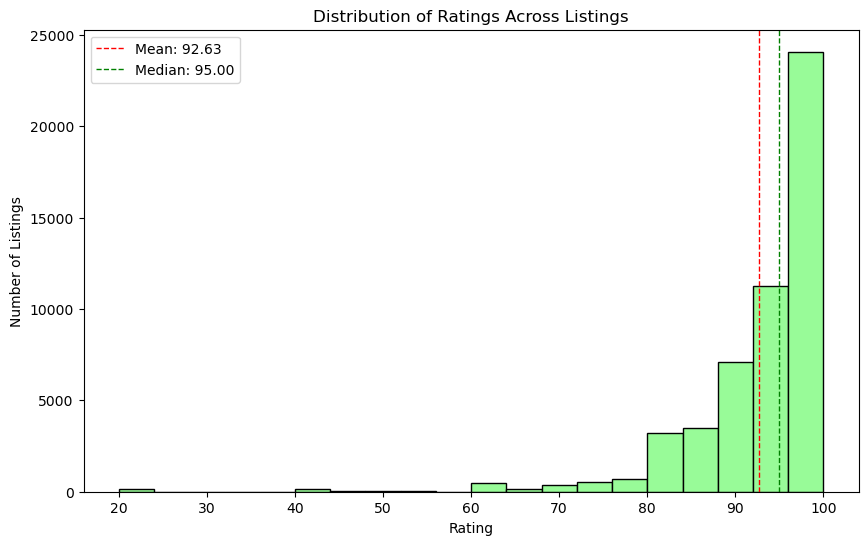

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df['guest_satisfaction_overall'].dropna(), bins=20, color='palegreen', edgecolor='black')
plt.axvline(rating_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {rating_mean:.2f}')
plt.axvline(rating_median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {rating_median:.2f}')
plt.xlabel('Rating')
plt.ylabel('Number of Listings')
plt.title('Distribution of Ratings Across Listings')
plt.legend()
plt.show()

***I believe the ratings are typically high across the listing, since the average value is 92.63 and the standard deviation is about 9. Also it's shown that most of the ratings are higher than 80!***

#### 6. How does person_capacity vary across listings? What is the most common capacity of listings?

In [17]:
capacity_mean = combined_df['person_capacity'].mean()
capacity_median = combined_df['person_capacity'].median()
capacity_std = combined_df['person_capacity'].std()
capacity_var = combined_df['person_capacity'].var()
capacity_mode = combined_df['person_capacity'].mode()[0]  
capacity_summary = pd.DataFrame({'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Variance', 'Most Common Capacity'],'Value': [capacity_mean, capacity_median, capacity_std, capacity_var , capacity_mode]})
capacity_summary

,Statistic,Value
0,Mean,3.161661
1,Median,3.000000
2,Standard Deviation,1.298545
3,Variance,1.686220
4,Most Common Capacity,2.000000


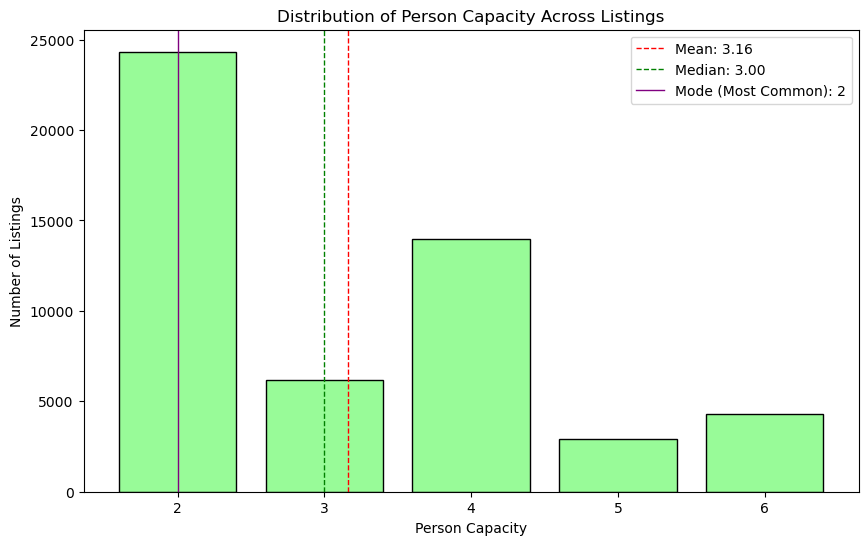

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(combined_df['person_capacity'].dropna(), bins=[2, 3, 4, 5, 6, 7], align='left', color='palegreen', edgecolor='black', rwidth=0.8)
plt.axvline(capacity_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {capacity_mean:.2f}')
plt.axvline(capacity_median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {capacity_median:.2f}')
plt.axvline(capacity_mode, color='purple', linestyle='solid', linewidth=1, label=f'Mode (Most Common): {capacity_mode}')
plt.xlabel('Person Capacity')
plt.ylabel('Number of Listings')
plt.title('Distribution of Person Capacity Across Listings')
plt.xticks([2, 3, 4, 5, 6])  # Set x-ticks to only show 2, 3, 4, 5, and 6
plt.legend()
plt.show()

#### 7. Plot the distribution of realSum for both weekday and weekend offers. Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations (e.g., log transformation) to normalize it.

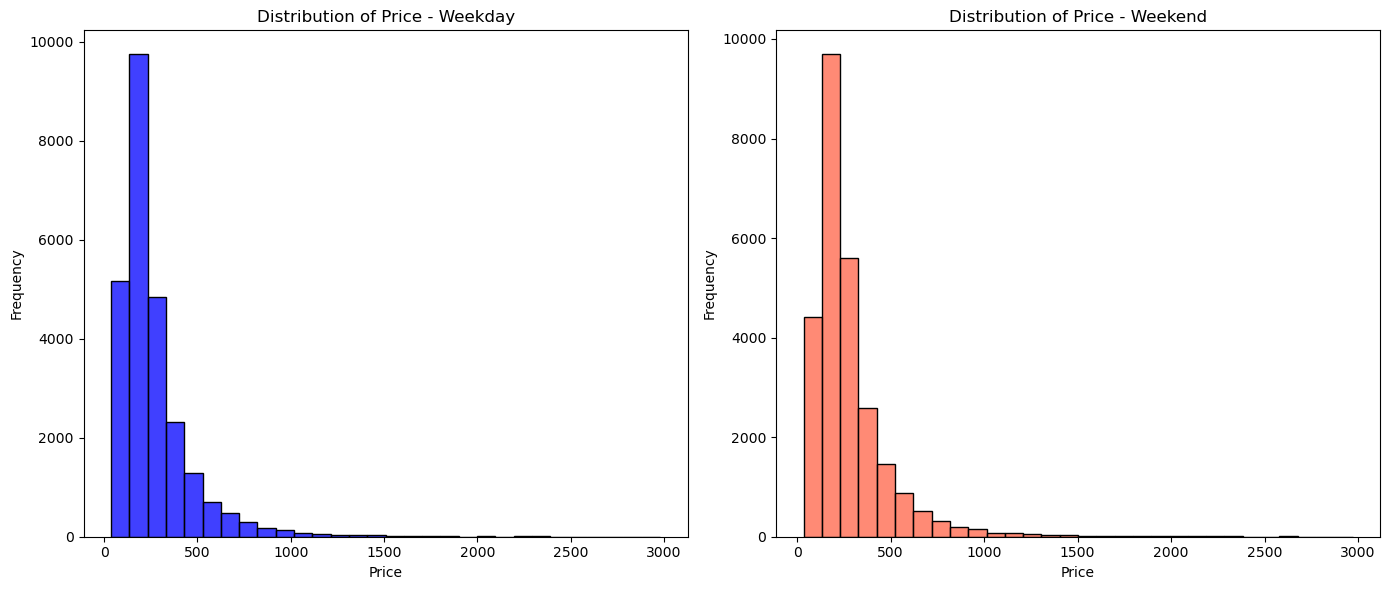

In [19]:
# Since there are many outliers with expensive prices, I have omitted prices higher than 3000 to shape a better plot!
weekday_offers = combined_df[(combined_df['DayType'] == 'Weekday') & (combined_df['Price'] <= 3000)]['Price']
weekend_offers = combined_df[(combined_df['DayType'] == 'Weekend') & (combined_df['Price'] <= 3000)]['Price']
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(weekday_offers, bins=30, kde=False, color='blue')
plt.title('Distribution of Price - Weekday')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(weekend_offers, bins=30, kde=False, color='tomato')
plt.title('Distribution of Price - Weekend')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

***As it can be seen, the distributions are not normal and they are both right-skewed***

***So, we have to use transformators to make it normal***

* Log Transformation

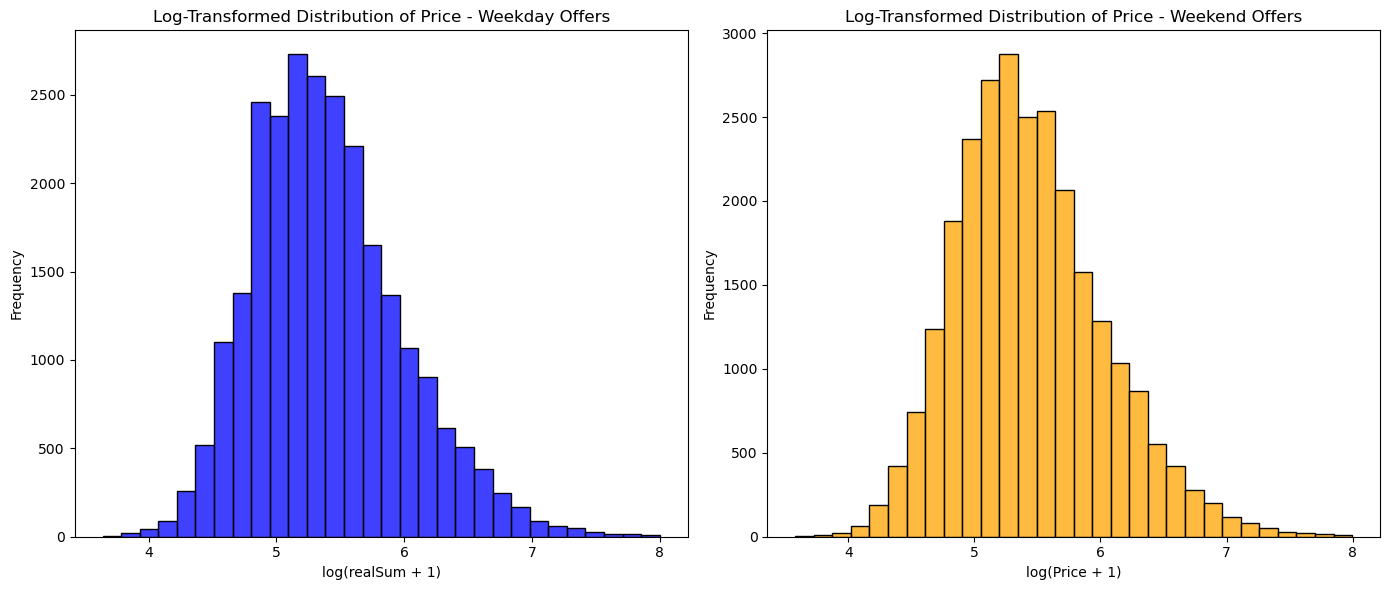

In [20]:
weekday_offers_log = np.log1p(weekday_offers)  # log1p for log(1 + x) to handle zero values
weekend_offers_log = np.log1p(weekend_offers)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(weekday_offers_log, bins=30, kde=False, color='blue')
plt.title('Log-Transformed Distribution of Price - Weekday Offers')
plt.xlabel('log(realSum + 1)')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(weekend_offers_log, bins=30, kde=False, color='orange')
plt.title('Log-Transformed Distribution of Price - Weekend Offers')
plt.xlabel('log(Price + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

* Besides Log Transformation, in this cell other transformations are also used

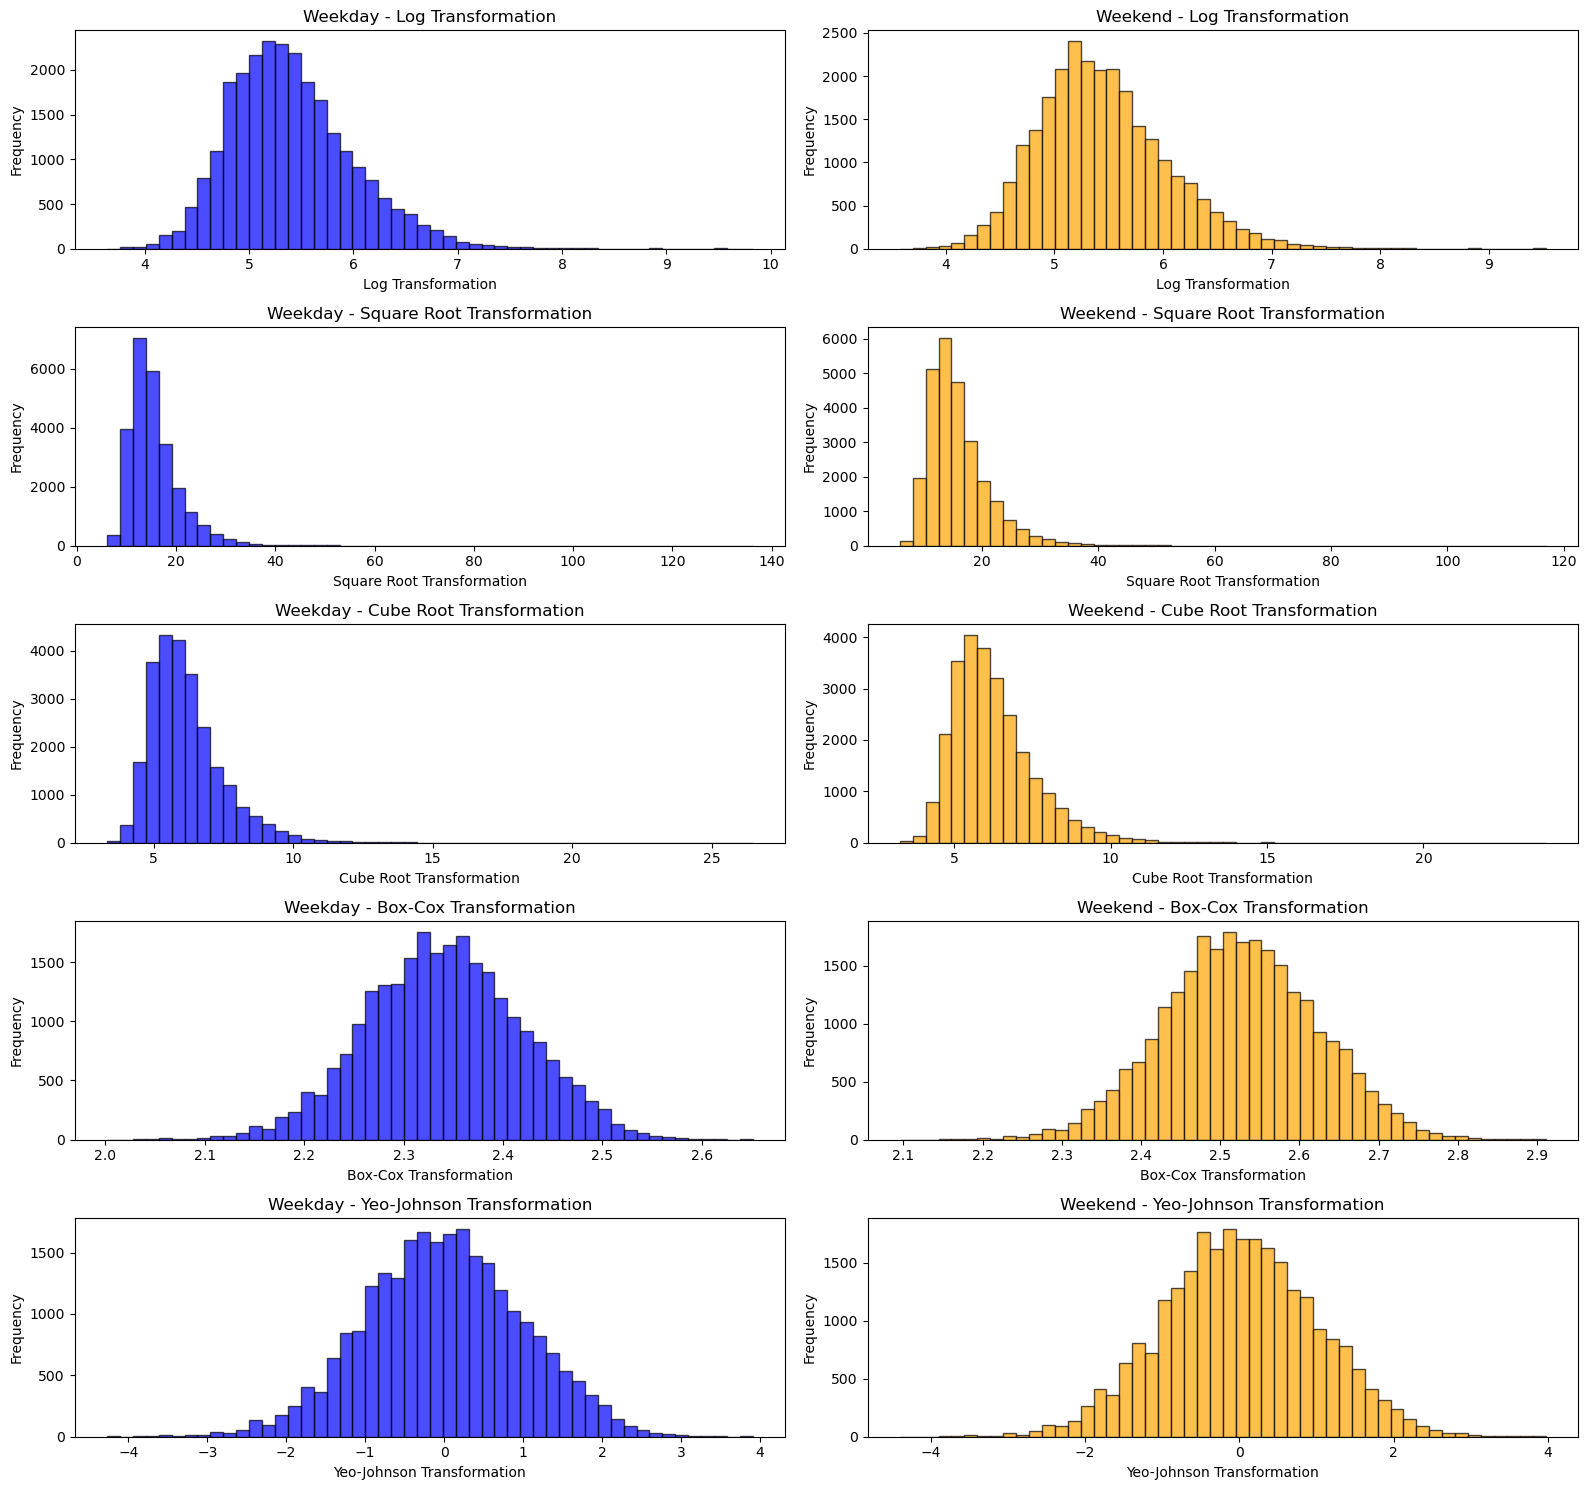

In [21]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

weekday_data = combined_df[combined_df['DayType'] == 'Weekday']['Price'].dropna()
weekend_data = combined_df[combined_df['DayType'] == 'Weekend']['Price'].dropna()
def apply_transformations(data):
    # 1. Log Transformation
    log_transformed = np.log1p(data)
    # 2. Square Root Transformation
    sqrt_transformed = np.sqrt(data)
    # 3. Cube Root Transformation
    cube_root_transformed = np.cbrt(data)
    # 4. Box-Cox Transformation (only for positive values)
    positive_data = data[data > 0]
    boxcox_transformed, _ = boxcox(positive_data) if not positive_data.empty else ([],)
    # 5. Yeo-Johnson Transformation (can handle both positive and negative values)
    yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
    yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(data.values.reshape(-1, 1)).flatten()

    return log_transformed, sqrt_transformed, cube_root_transformed, boxcox_transformed, yeo_johnson_transformed

weekday_transforms = apply_transformations(weekday_data)
weekend_transforms = apply_transformations(weekend_data)
transform_titles = ['Log Transformation', 'Square Root Transformation', 'Cube Root Transformation', 'Box-Cox Transformation', 'Yeo-Johnson Transformation']
plt.figure(figsize=(16, 15))
for i, (weekday_transform, weekend_transform, title) in enumerate(zip(weekday_transforms, weekend_transforms, transform_titles), 1):
    plt.subplot(5, 2, 2*i - 1)
    plt.hist(weekday_transform, bins=50, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Weekday - {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.subplot(5, 2, 2*i)
    plt.hist(weekend_transform, bins=50, color='orange', edgecolor='black', alpha=0.7)
    plt.title(f'Weekend - {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**The proposed transformation which was Log Transformation has an acceptable performance. Also, Box-Cox and Yeo-Johnson perform well**

#### 8. Plot the distribution of guest_satisfaction_overall ratings.

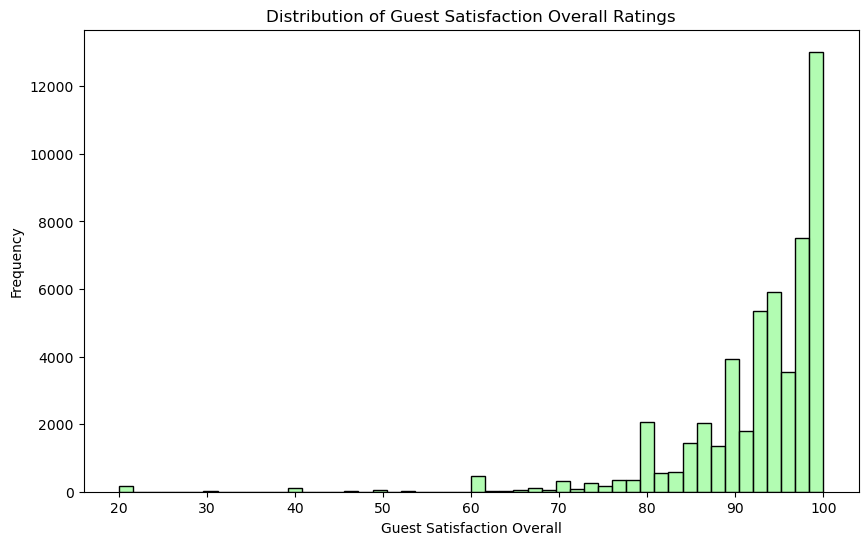

In [22]:
satisfaction_ratings = combined_df['guest_satisfaction_overall'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(satisfaction_ratings, bins=50, kde=False, color='palegreen', edgecolor='black')
plt.title('Distribution of Guest Satisfaction Overall Ratings')
plt.xlabel('Guest Satisfaction Overall')
plt.ylabel('Frequency')
plt.show()

#### 9. Examine the distribution of cleanliness_rating.

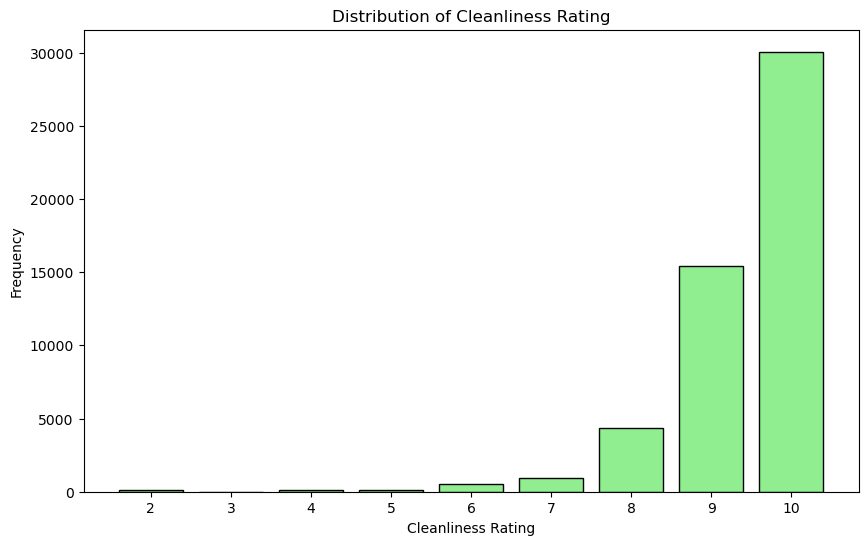

In [23]:
cleanliness_ratings = combined_df['cleanliness_rating'].dropna()
rating_counts = cleanliness_ratings.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='lightgreen', edgecolor='black')
plt.title('Distribution of Cleanliness Rating')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.xticks(range(int(cleanliness_ratings.min()), int(cleanliness_ratings.max()) + 1))
plt.show()

### Suggested questions for testing
#### 1. Is there a difference in price between two cities? Choose at least three pairs of cities during weekdays.

***For all questions related to testing, at first we have to determine whether the data is normal or not. To do this, We can use Shapiro-Wilk test which is good for small data samples or we can use Kolmogorov-Smirnov test which is great for big data sample like this dataset***

***If the distribution is normal, we can put to use the T-test. However, if the distribution is not normal, we have to go for Mann-Whitney U-test.***

In [24]:
from scipy.stats import kstest, ttest_ind, mannwhitneyu
weekday_data = combined_df[combined_df['DayType'] == 'Weekday']
city_pairs = [
    ('London', 'Paris'), 
    ('Berlin', 'Vienna'), 
    ('Barcelona', 'Lisbon')
]
for city1, city2 in city_pairs:
    city1_data = weekday_data[weekday_data['City'] == city1]['Price']
    city2_data = weekday_data[weekday_data['City'] == city2]['Price']   
    _, p_value_city1 = kstest(city1_data, 'norm', args=(city1_data.mean(), city1_data.std()))
    _, p_value_city2 = kstest(city2_data, 'norm', args=(city2_data.mean(), city2_data.std()))
    print(f"\nKolmogorov-Smirnov test p-values for normality:")
    print(f"{city1}: {p_value_city1:.4f}, {city2}: {p_value_city2:.4f}")
    if p_value_city1 > 0.05 and p_value_city2 > 0.05:
        t_stat, p_value = ttest_ind(city1_data, city2_data, equal_var=False)
        test_type = 't-test'
    else:
        t_stat, p_value = mannwhitneyu(city1_data, city2_data, alternative='two-sided')
        test_type = 'Mann-Whitney U test'
    print(f"\nPrice comparison between {city1} and {city2} using {test_type}:")
    print(f"Test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("=> Significant difference in prices (p < 0.05)")
    else:
        print("=> No significant difference in prices (p >= 0.05)")
    print("-" * 50)


Kolmogorov-Smirnov test p-values for normality:
London: 0.0000, Paris: 0.0000

Price comparison between London and Paris using Mann-Whitney U test:
Test statistic: 5654803.00, p-value: 0.0000
=> Significant difference in prices (p < 0.05)
--------------------------------------------------

Kolmogorov-Smirnov test p-values for normality:
Berlin: 0.0000, Vienna: 0.0000

Price comparison between Berlin and Vienna using Mann-Whitney U test:
Test statistic: 1032365.00, p-value: 0.0004
=> Significant difference in prices (p < 0.05)
--------------------------------------------------

Kolmogorov-Smirnov test p-values for normality:
Barcelona: 0.0000, Lisbon: 0.0000

Price comparison between Barcelona and Lisbon using Mann-Whitney U test:
Test statistic: 2299550.00, p-value: 0.0529
=> No significant difference in prices (p >= 0.05)
--------------------------------------------------


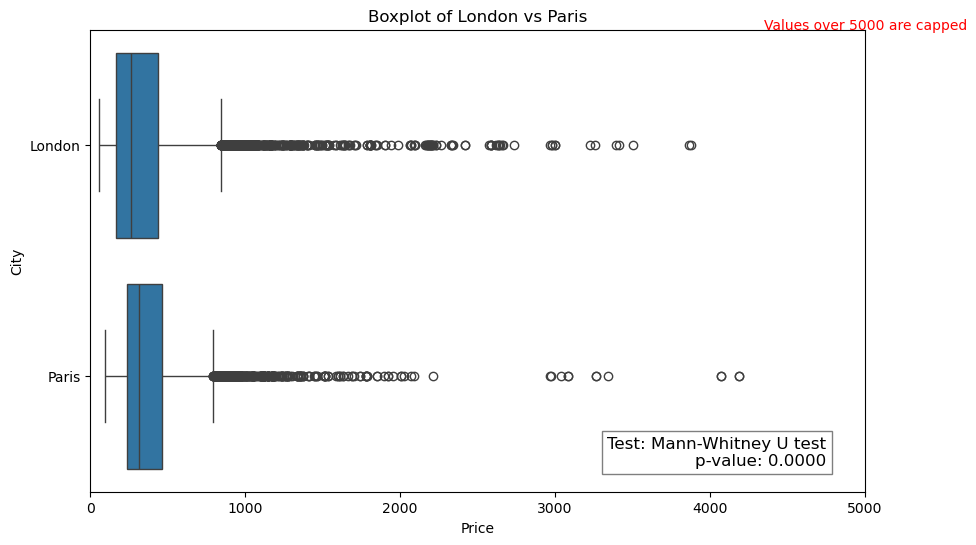

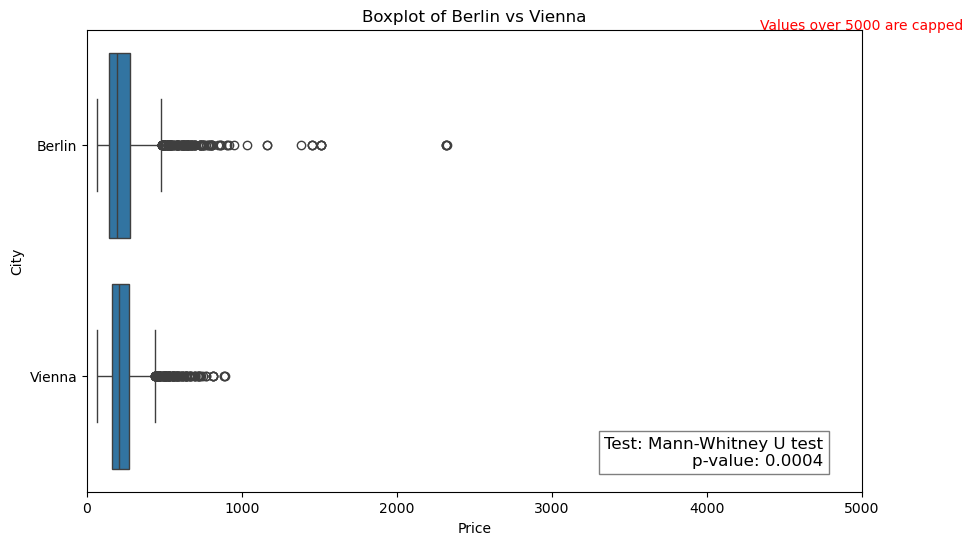

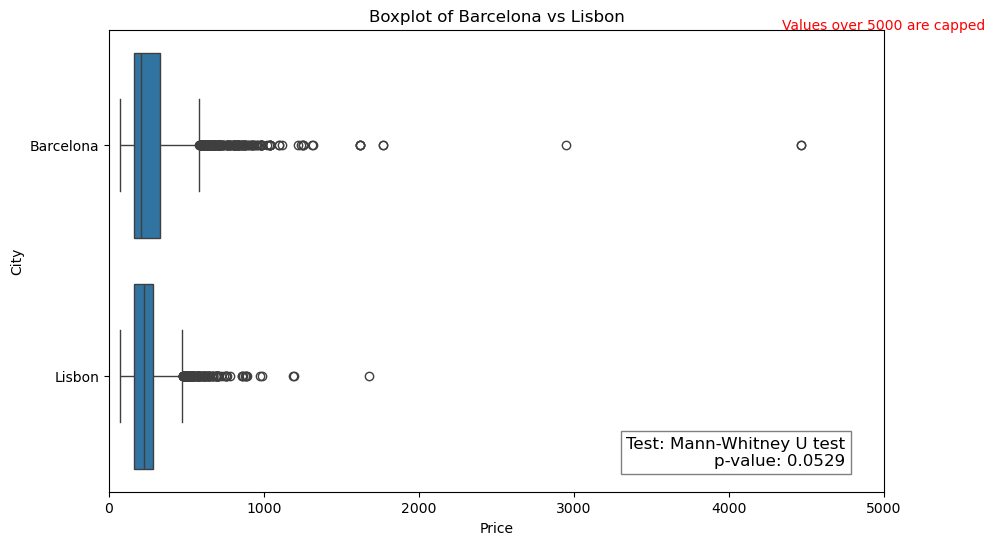

In [25]:
def plot_city_pair_boxplot(data, city1, city2, value_col='Price', test_name="Mann-Whitney U test", p_value=None):
    """
    Plot a horizontal boxplot for two cities with the test name and p-value displayed.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - city1 (str): The name of the first city in the pair.
    - city2 (str): The name of the second city in the pair.
    - value_col (str): The column name for the values (e.g., "price" or "realSum").
    - test_name (str): The name of the statistical test (e.g., "Mann-Whitney U test").
    - p_value (float): The p-value from the statistical test.
    """    
    city_data = data[data['City'].isin([city1, city2])]
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='City', x=value_col, data=city_data, orient="h")
    plt.title(f"Boxplot of {city1} vs {city2}")
    plt.ylabel("City")
    plt.xlabel(value_col.capitalize())
    plt.xlim(0, 5000)
    plt.text(5000, -0.5, "Values over 5000 are capped", ha='center', fontsize=10, color="red")

    annotation_text = f"Test: {test_name}\np-value: {p_value:.4f}" if p_value is not None else ""
    plt.text(0.95, 0.05, annotation_text, transform=plt.gca().transAxes,
             ha='right', va='bottom', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

city_pairs = [
    ('London', 'Paris', 0.0000),
    ('Berlin', 'Vienna', 0.0004),
    ('Barcelona', 'Lisbon', 0.0529)
]
for city1, city2, p_value in city_pairs:
    plot_city_pair_boxplot(data=combined_df, city1=city1, city2=city2, value_col='Price', 
                           test_name="Mann-Whitney U test", p_value=p_value)

#### 2. Does the price tend to be higher on weekends?

In [28]:
weekday_prices.mean()

275.6819041766247

In [29]:
weekend_prices.mean()

283.9640348058675

In [27]:
weekday_prices = combined_df[combined_df['DayType'] == 'Weekday']['Price']
weekend_prices = combined_df[combined_df['DayType'] == 'Weekend']['Price']
# Check for normality using the Kolmogorov-Smirnov test (Because the dataset is large)
_, p_value_weekday = kstest(weekday_prices, 'norm', args=(weekday_prices.mean(), weekday_prices.std()))
_, p_value_weekend = kstest(weekend_prices, 'norm', args=(weekend_prices.mean(), weekend_prices.std()))
print(f"Kolmogorov-Smirnov test p-value for weekday prices: {p_value_weekday:.4f}")
print(f"Kolmogorov-Smirnov test p-value for weekend prices: {p_value_weekend:.4f}")
# If both p-values are greater than 0.05, we assume normality for both samples
if p_value_weekday > 0.05 and p_value_weekend > 0.05:
    t_stat, p_value = ttest_ind(weekday_prices, weekend_prices, equal_var=False)
    test_type = 't-test'
else:
    t_stat, p_value = mannwhitneyu(weekday_prices, weekend_prices, alternative='two-sided')
    test_type = 'Mann-Whitney U test'
print(f"\nPrice comparison between Weekdays and Weekends using {test_type}:")
print(f"Test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("=> Significant difference in prices (p < 0.05)")
else:
    print("=> No significant difference in prices (p >= 0.05)")

Kolmogorov-Smirnov test p-value for weekday prices: 0.0000
Kolmogorov-Smirnov test p-value for weekend prices: 0.0000

Price comparison between Weekdays and Weekends using Mann-Whitney U test:
Test statistic: 320313415.00, p-value: 0.0000
=> Significant difference in prices (p < 0.05)


***The results of U-test suggests that there exist a significant difference in weekday and weekend prices!***

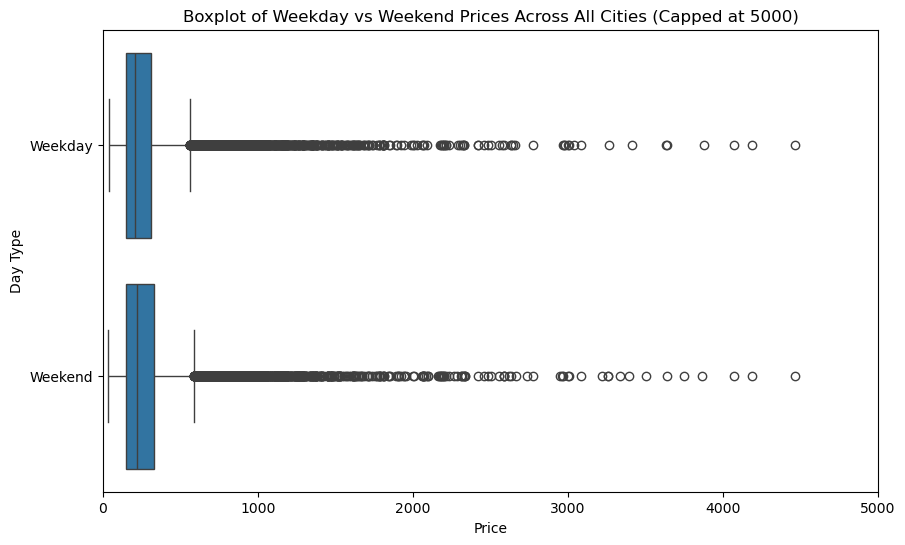

In [30]:
def plot_weekday_vs_weekend_combined(data, value_col='Price'):
    """
    Plot a horizontal boxplot comparing weekday vs weekend prices across all cities,
    capping values at 5000 and labeling them as "over 5000".

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - value_col (str): The column name for the values (e.g., "price" or "realSum").
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='DayType', x=value_col, data=data, orient="h", order=["Weekday", "Weekend"])
    plt.title("Boxplot of Weekday vs Weekend Prices Across All Cities (Capped at 5000)")
    plt.ylabel("Day Type")
    plt.xlabel(value_col.capitalize())
    plt.xlim(0, 5000)  # Set x-axis limit to 5000
    plt.show()
plot_weekday_vs_weekend_combined(data=combined_df, value_col='Price')

#### 3. Are listings of superhosts more expensive than those of normal hosts?

In [31]:
superhost_prices = combined_df[combined_df['host_is_superhost'] == True]['Price']
normalhost_prices = combined_df[combined_df['host_is_superhost'] == False]['Price']
_, p_value_superhost = kstest(superhost_prices, 'norm', args=(superhost_prices.mean(), superhost_prices.std()))
_, p_value_normalhost = kstest(normalhost_prices, 'norm', args=(normalhost_prices.mean(), normalhost_prices.std()))
print(f"Kolmogorov-Smirnov test p-value for Superhost prices: {p_value_superhost:.4f}")
print(f"Kolmogorov-Smirnov test p-value for Normalhost prices: {p_value_normalhost:.4f}")
if p_value_superhost > 0.05 and p_value_normalhost > 0.05:
    t_stat, p_value = ttest_ind(superhost_prices, normalhost_prices, equal_var=False)
    test_type = 't-test'
else:
    t_stat, p_value = mannwhitneyu(superhost_prices, normalhost_prices, alternative='two-sided')
    test_type = 'Mann-Whitney U test'
print(f"\nPrice comparison between Superhosts and Normalhosts using {test_type}:")
print(f"Test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("=> Significant difference in prices (p < 0.05)")
else:
    print("=> No significant difference in prices (p >= 0.05)")

superhost_mean = superhost_prices.mean()
normalhost_mean = normalhost_prices.mean()
print(f"\nAverage price for Superhosts: {superhost_mean:.2f}")
print(f"Average price for Normal-hosts: {normalhost_mean:.2f}")

Kolmogorov-Smirnov test p-value for Superhost prices: 0.0000
Kolmogorov-Smirnov test p-value for Normalhost prices: 0.0000

Price comparison between Superhosts and Normalhosts using Mann-Whitney U test:
Test statistic: 230623961.50, p-value: 0.0000
=> Significant difference in prices (p < 0.05)

Average price for Superhosts: 254.45
Average price for Normal-hosts: 288.63


***It is shown that there is a significant difference between Superhost and Normal hosts prices. However, it suggests that listings of superhosts are <u>cheaper</u> than those of normal host!***

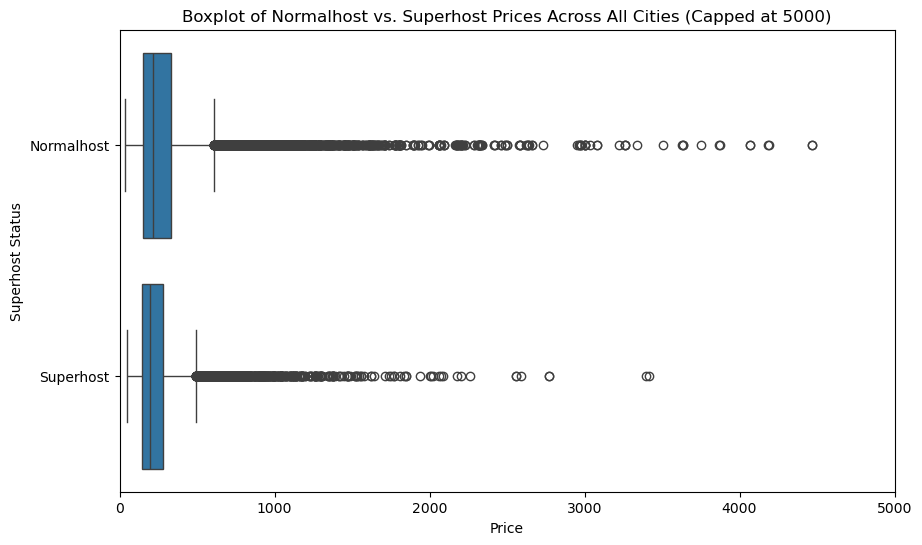

In [32]:
def plot_superhost_vs_normalhost(data, value_col='Price'):
    """
    Plot a horizontal boxplot comparing prices for Superhosts vs Non-Superhosts across all cities.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - value_col (str): The column name for the values (e.g., "price").
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='host_is_superhost', x=value_col, data=data, orient="h", order=[False, True])
    plt.title("Boxplot of Normalhost vs. Superhost Prices Across All Cities (Capped at 5000)")
    plt.ylabel("Superhost Status")
    plt.xlabel(value_col.capitalize())
    plt.yticks([0, 1], ["Normalhost", "Superhost"])
    plt.xlim(0, 5000)  # Set x-axis limit to 5000
    plt.show()
plot_superhost_vs_normalhost(data=combined_df, value_col='Price')

#### 4. Are superhosts closer to the city center and metro station than normal hosts?

In [33]:
superhost_dist_city = combined_df[combined_df['host_is_superhost'] == True]['dist']
non_superhost_dist_city = combined_df[combined_df['host_is_superhost'] == False]['dist']
superhost_dist_metro = combined_df[combined_df['host_is_superhost'] == True]['metro_dist']
non_superhost_dist_metro = combined_df[combined_df['host_is_superhost'] == False]['metro_dist']
# Check for normality using Kolmogorov-Smirnov test
_, p_value_city_sh = kstest(superhost_dist_city, 'norm', args=(superhost_dist_city.mean(), superhost_dist_city.std()))
_, p_value_city_non_sh = kstest(non_superhost_dist_city, 'norm', args=(non_superhost_dist_city.mean(), non_superhost_dist_city.std()))
_, p_value_metro_sh = kstest(superhost_dist_metro, 'norm', args=(superhost_dist_metro.mean(), superhost_dist_metro.std()))
_, p_value_metro_non_sh = kstest(non_superhost_dist_metro, 'norm', args=(non_superhost_dist_metro.mean(), non_superhost_dist_metro.std()))
if p_value_city_sh > 0.05 and p_value_city_non_sh > 0.05:
    # Use t-test for distance to city center
    t_stat_city, p_value_city = ttest_ind(superhost_dist_city, non_superhost_dist_city, equal_var=False)
    test_type_city = 't-test'
else:
    # Use Mann-Whitney U test for distance to city center
    t_stat_city, p_value_city = mannwhitneyu(superhost_dist_city, non_superhost_dist_city, alternative='two-sided')
    test_type_city = 'Mann-Whitney U test'
if p_value_metro_sh > 0.05 and p_value_metro_non_sh > 0.05:
    # Use t-test for distance to metro station
    t_stat_metro, p_value_metro = ttest_ind(superhost_dist_metro, non_superhost_dist_metro, equal_var=False)
    test_type_metro = 't-test'
else:
    # Use Mann-Whitney U test for distance to metro station
    t_stat_metro, p_value_metro = mannwhitneyu(superhost_dist_metro, non_superhost_dist_metro, alternative='two-sided')
    test_type_metro = 'Mann-Whitney U test'
print(f"\nDistance comparison to City Center using {test_type_city}:")
print(f"Test statistic: {t_stat_city:.2f}, p-value: {p_value_city:.4f}")
if p_value_city < 0.05:
    print("=> Significant difference in distances to city center (p < 0.05)")
else:
    print("=> No significant difference in distances to city center (p >= 0.05)")

print(f"\nDistance comparison to Metro Station using {test_type_metro}:")
print(f"Test statistic: {t_stat_metro:.2f}, p-value: {p_value_metro:.4f}")
if p_value_metro < 0.05:
    print("=> Significant difference in distances to metro station (p < 0.05)")
else:
    print("=> No significant difference in distances to metro station (p >= 0.05)")
superhost_dist_city_mean = superhost_dist_city.mean()
non_superhost_dist_city_mean = non_superhost_dist_city.mean()
superhost_dist_metro_mean = superhost_dist_metro.mean()
non_superhost_dist_metro_mean = non_superhost_dist_metro.mean()
print(f"\nAverage distance to city center for Superhosts: {superhost_dist_city_mean:.2f}")
print(f"Average distance to city center for Normal-hosts: {non_superhost_dist_city_mean:.2f}")
print(f"\nAverage distance to metro for Superhosts: {superhost_dist_metro_mean:.2f}")
print(f"Average distance to metro for Normal-hosts: {non_superhost_dist_metro_mean:.2f}")


Distance comparison to City Center using Mann-Whitney U test:
Test statistic: 232379752.00, p-value: 0.0000
=> Significant difference in distances to city center (p < 0.05)

Distance comparison to Metro Station using Mann-Whitney U test:
Test statistic: 263778575.00, p-value: 0.0000
=> Significant difference in distances to metro station (p < 0.05)

Average distance to city center for Superhosts: 2.96
Average distance to city center for Normal-hosts: 3.27

Average distance to metro for Superhosts: 0.68
Average distance to metro for Normal-hosts: 0.68


***For the both distances to City Center and Metro Station, p-value is less than 0.05 which suggests the significant difference in distances. When we check the Mean (Average distance), we notice that superhosts are normally closer to city center but, have the same distance as normal hosts to metro stations!***

***This is why in following, we examined the median distance and also, the distribution of distances to metro stations in order to understand this result better***

In [34]:
superhost_median_city = superhost_dist_city.median()
non_superhost_median_city = non_superhost_dist_city.median()
superhost_median_metro = superhost_dist_metro.median()
non_superhost_median_metro = non_superhost_dist_metro.median()
print(f"Median distance to city center for Superhosts: {superhost_median_city:.2f} km")
print(f"Median distance to city center for Normalhosts: {non_superhost_median_city:.2f} km")
print(f"\nMedian distance to metro for Superhosts: {superhost_median_metro:.2f} km")
print(f"Median distance to metro for Normalhosts: {non_superhost_median_metro:.2f} km")

Median distance to city center for Superhosts: 2.39 km
Median distance to city center for Normalhosts: 2.70 km

Median distance to metro for Superhosts: 0.43 km
Median distance to metro for Normalhosts: 0.41 km


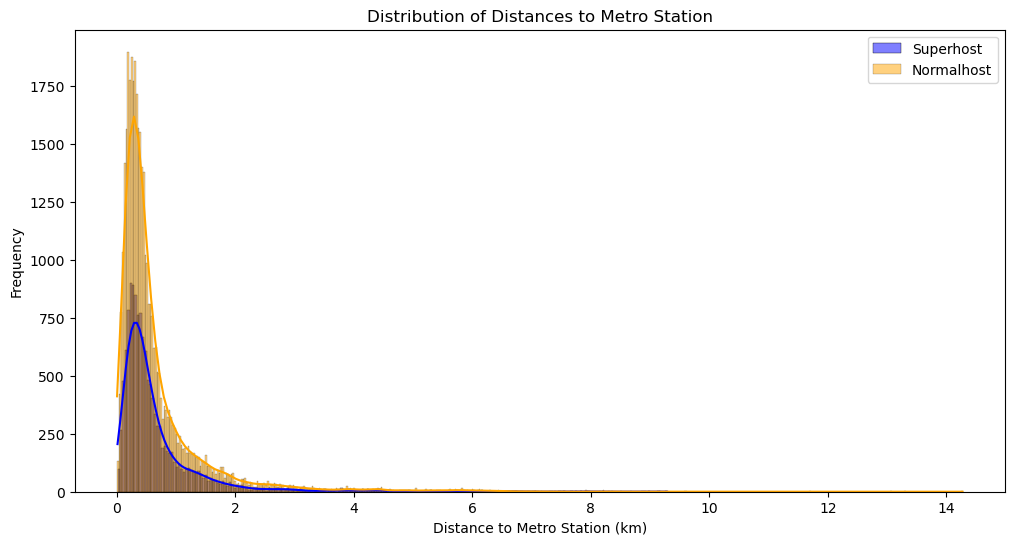

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(superhost_dist_metro, color='blue', label='Superhost', kde=True)
sns.histplot(non_superhost_dist_metro, color='orange', label='Normalhost', kde=True)
plt.legend()
plt.title('Distribution of Distances to Metro Station')
plt.xlabel('Distance to Metro Station (km)')
plt.ylabel('Frequency')
plt.show()

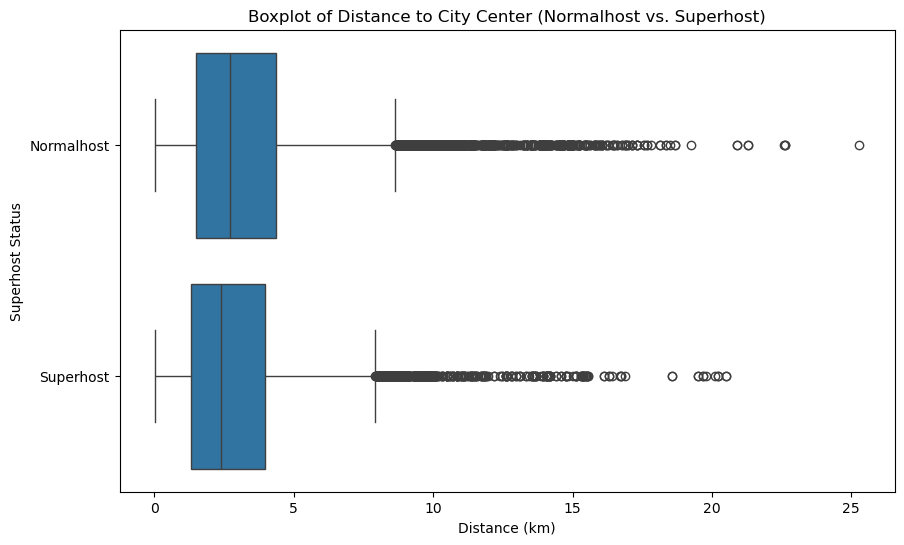

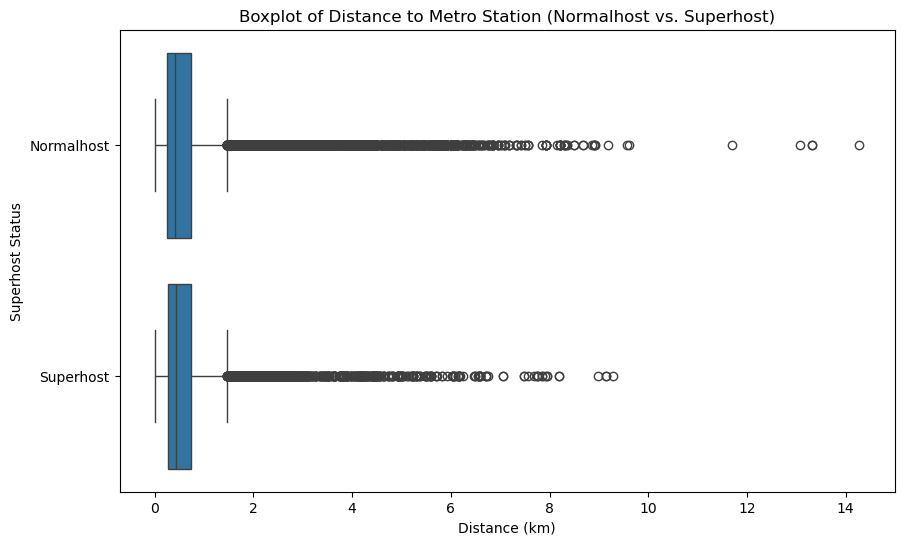

In [36]:
def plot_distance_boxplot(data, distance_col, title):
    """
    Plot a horizontal boxplot comparing distances for Superhost vs Non-Superhosts.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    - distance_col (str): The column name for the distance values (e.g., "distance_to_city_center" or "distance_to_metro_station").
    - title (str): The title for the plot.
    """
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='host_is_superhost', x=distance_col, data=data, orient="h", order=[False, True])
    plt.title(title)
    plt.ylabel("Superhost Status")
    plt.xlabel("Distance (km)")
    plt.yticks([0, 1], ["Normalhost", "Superhost"])  # Customize y-axis labels

    plt.show()
plot_distance_boxplot(data=combined_df, distance_col='dist', title="Boxplot of Distance to City Center (Normalhost vs. Superhost)")
plot_distance_boxplot(data=combined_df, distance_col='metro_dist', title="Boxplot of Distance to Metro Station (Normalhost vs. Superhost)")

#### 5. Are superhosts cleaner than normal hosts?

In [38]:
superhost_cleanliness = combined_df[combined_df['host_is_superhost'] == True]['cleanliness_rating']
non_superhost_cleanliness = combined_df[combined_df['host_is_superhost'] == False]['cleanliness_rating']
_, p_value_clean_sh = kstest(superhost_cleanliness, 'norm', args=(superhost_cleanliness.mean(), superhost_cleanliness.std()))
_, p_value_clean_non_sh = kstest(non_superhost_cleanliness, 'norm', args=(non_superhost_cleanliness.mean(), non_superhost_cleanliness.std()))
print(f"Kolmogorov-Smirnov test p-value for Superhost cleanliness: {p_value_clean_sh:.4f}")
print(f"Kolmogorov-Smirnov test p-value for Normalhost cleanliness: {p_value_clean_non_sh:.4f}")
if p_value_clean_sh > 0.05 and p_value_clean_non_sh > 0.05:
    t_stat, p_value = ttest_ind(superhost_cleanliness, non_superhost_cleanliness, equal_var=False)
    test_type = 't-test'
else:
    t_stat, p_value = mannwhitneyu(superhost_cleanliness, non_superhost_cleanliness, alternative='two-sided')
    test_type = 'Mann-Whitney U test'
print(f"\nCleanliness rating comparison between Superhosts and Normalhosts using {test_type}:")
print(f"Test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("=> Significant difference in cleanliness ratings (p < 0.05)")
else:
    print("=> No significant difference in cleanliness ratings (p >= 0.05)")

superhost_mean_cleanliness = superhost_cleanliness.mean()
non_superhost_mean_cleanliness = non_superhost_cleanliness.mean()
print(f"\nMean cleanliness rating for Superhosts: {superhost_mean_cleanliness:.2f}")
print(f"Mean cleanliness rating for Normalhosts: {non_superhost_mean_cleanliness:.2f}")
superhost_median_cleanliness = superhost_cleanliness.median()
non_superhost_median_cleanliness = non_superhost_cleanliness.median()
print(f"\nMedian cleanliness rating for Superhosts: {superhost_median_cleanliness:.2f}")
print(f"Median cleanliness rating for Normalhosts: {non_superhost_median_cleanliness:.2f}")

Kolmogorov-Smirnov test p-value for Superhost cleanliness: 0.0000
Kolmogorov-Smirnov test p-value for Normalhost cleanliness: 0.0000

Cleanliness rating comparison between Superhosts and Normalhosts using Mann-Whitney U test:
Test statistic: 350501184.50, p-value: 0.0000
=> Significant difference in cleanliness ratings (p < 0.05)

Mean cleanliness rating for Superhosts: 9.83
Mean cleanliness rating for Normalhosts: 9.24

Median cleanliness rating for Superhosts: 10.00
Median cleanliness rating for Normalhosts: 9.00


***There is a significant difference in cleanliness ratings between superhosts & normal hosts and it proves that superhosts are cleaner!***

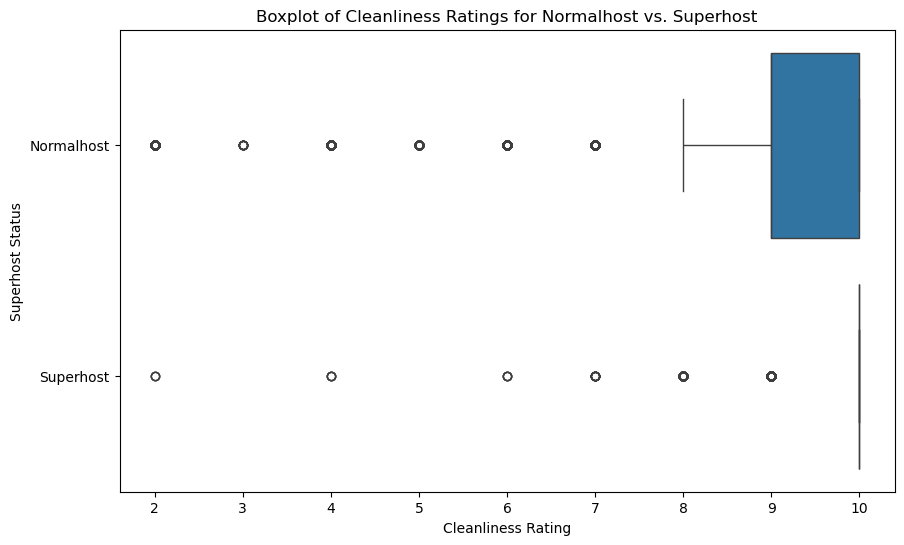

In [39]:
def plot_cleanliness_boxplot(data):
    """
    Plot a horizontal boxplot comparing cleanliness ratings for Superhosts vs Non-Superhosts.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='host_is_superhost', x='cleanliness_rating', data=data, orient="h", order=[False, True])
    plt.title("Boxplot of Cleanliness Ratings for Normalhost vs. Superhost")
    plt.ylabel("Superhost Status")
    plt.xlabel("Cleanliness Rating")
    plt.yticks([0, 1], ["Normalhost", "Superhost"])  # Customize y-axis labels

    plt.show()
plot_cleanliness_boxplot(data=combined_df)

#### 6. Is there a pattern between room types and superhost status?

***This question is different to previous ones and the Chi-Square test should be implemented!***

In [40]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(combined_df['room_type'], combined_df['host_is_superhost'])
print("Contingency Table:")
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test of Independence:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
if p < 0.05:
    print("=> Significant association between room type and Superhost status (p < 0.05)")
else:
    print("=> No significant association between room type and Superhost status (p >= 0.05)")
print("\nExpected frequencies if there were no association:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Contingency Table:
host_is_superhost  False  True 
room_type                      
Entire home/apt    23704   8944
Private room       14446   4247
Shared room          325     41

Chi-Square Test of Independence:
Chi-square statistic: 176.54
p-value: 0.0000
Degrees of freedom: 2
=> Significant association between room type and Superhost status (p < 0.05)

Expected frequencies if there were no association:
host_is_superhost         False        True 
room_type                                   
Entire home/apt    24293.263968  8354.736032
Private room       13909.396697  4783.603303
Shared room          272.339335    93.660665


***As the results suggest, there is a significant association (pattern) between room types and superhost status. Also the value of Chi-square statistic is not so high and is relatively close to expected values!***

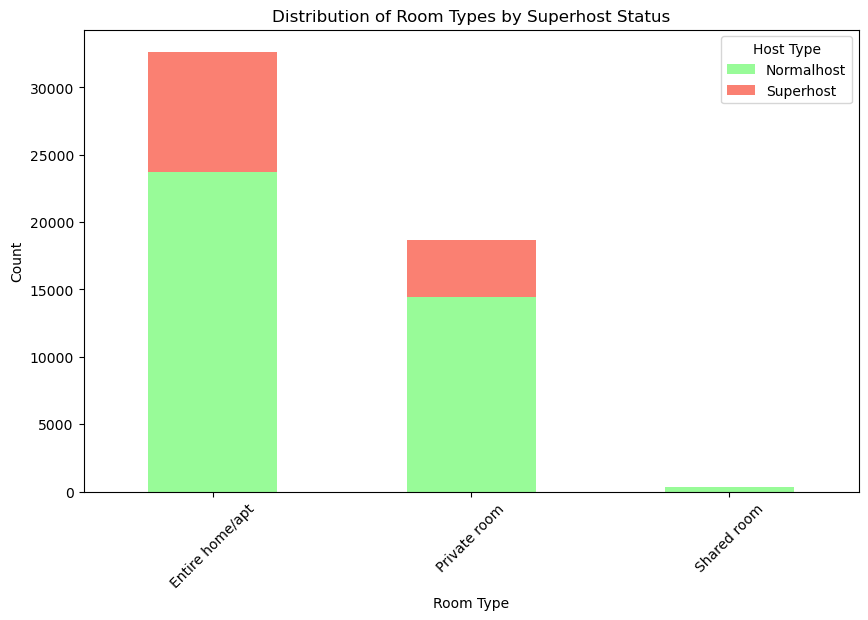

In [41]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['palegreen', 'salmon'])
plt.title("Distribution of Room Types by Superhost Status")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.legend(["Normalhost", "Superhost"], title="Host Type")
plt.xticks(rotation=45)
plt.show()

#### 7. Is renting an Entire home/apt more expensive than a private room? Does that depend on the city?

In [42]:
entire_home_prices = combined_df[combined_df['room_type'] == 'Entire home/apt']['Price']
private_room_prices = combined_df[combined_df['room_type'] == 'Private room']['Price']
# Check for normality (using Kolmogorov-Smirnov test)
_, p_value_entire_home = kstest(entire_home_prices, 'norm', args=(entire_home_prices.mean(), entire_home_prices.std()))
_, p_value_private_room = kstest(private_room_prices, 'norm', args=(private_room_prices.mean(), private_room_prices.std()))
if p_value_entire_home > 0.05 and p_value_private_room > 0.05:
    t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices, equal_var=False)
    test_type = 't-test'
else:
    t_stat, p_value = mannwhitneyu(entire_home_prices, private_room_prices, alternative='two-sided')
    test_type = 'Mann-Whitney U test'
print(f"Price comparison between Entire home/apt and Private room using {test_type}:")
print(f"Test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("=> Significant difference in prices (p < 0.05)")
else:
    print("=> No significant difference in prices (p >= 0.05)")
entire_home_prices_mean = entire_home_prices.mean()
private_room_prices_mean = private_room_prices.mean()
print(f"\nMean Entire_home_price: {entire_home_prices_mean:.2f}")
print(f"Mean private_room_price: {private_room_prices_mean:.2f}")

entire_home_prices_median = entire_home_prices.median()
private_room_prices_median = private_room_prices.median()
print(f"\nMedian Entire_home_price: {entire_home_prices_median:.2f}")
print(f"Median private_room_price: {private_room_prices_median:.2f}")

Price comparison between Entire home/apt and Private room using Mann-Whitney U test:
Test statistic: 430383459.50, p-value: 0.0000
=> Significant difference in prices (p < 0.05)

Mean Entire_home_price: 324.32
Mean private_room_price: 204.94

Median Entire_home_price: 248.46
Median private_room_price: 166.37


***The U-test shows that there is a significant difference between Entire home/apt and Private room prices. It is also obvious from the mean that private rooms are cheaper!***

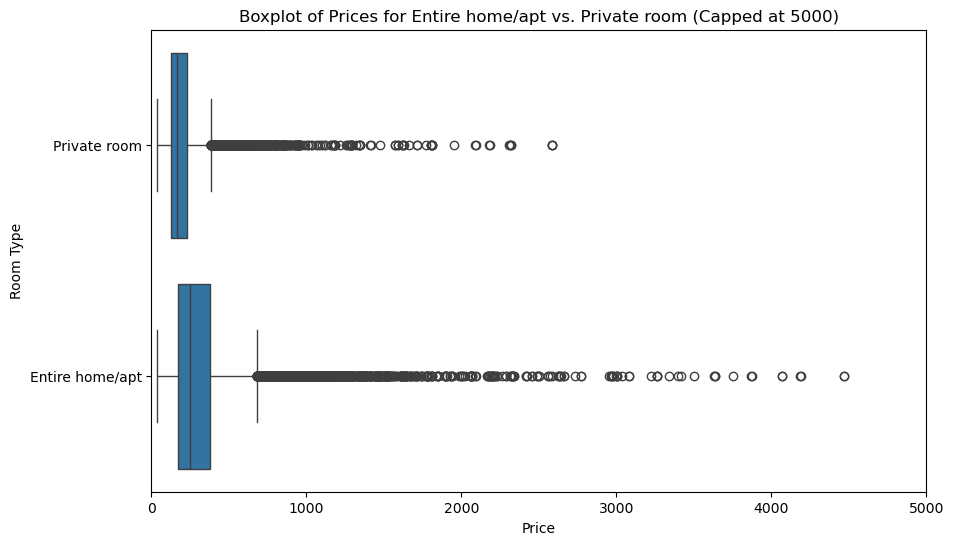

In [45]:
def plot_price_boxplot(data):
    """
    Plot a horizontal boxplot comparing prices for Entire home/apt vs. Private room across all cities.

    Parameters:
    - data (DataFrame): The DataFrame containing the data.
    """    
    filtered_data = data[data['room_type'].isin(['Entire home/apt', 'Private room'])]
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='room_type', x='Price', data=filtered_data, orient="h", order=['Private room', 'Entire home/apt'])
    plt.title("Boxplot of Prices for Entire home/apt vs. Private room (Capped at 5000)")
    plt.ylabel("Room Type")
    plt.xlabel("Price")
    plt.xlim(0, 5000)
    plt.show()
plot_price_boxplot(data=combined_df)

***In the following, we have examined if this price difference has any relation or dependency to cities.***

In [46]:
cities = combined_df['City'].unique()
for city in cities:
    city_data = combined_df[combined_df['City'] == city]
    entire_home_prices = city_data[city_data['room_type'] == 'Entire home/apt']['Price']
    private_room_prices = city_data[city_data['room_type'] == 'Private room']['Price']
    _, p_value_entire_home = kstest(entire_home_prices, 'norm', args=(entire_home_prices.mean(), entire_home_prices.std()))
    _, p_value_private_room = kstest(private_room_prices, 'norm', args=(private_room_prices.mean(), private_room_prices.std()))
    if p_value_entire_home > 0.05 and p_value_private_room > 0.05:
        t_stat, p_value = ttest_ind(entire_home_prices, private_room_prices, equal_var=False)
        test_type = 't-test'
    else:
        t_stat, p_value = mannwhitneyu(entire_home_prices, private_room_prices, alternative='two-sided')
        test_type = 'Mann-Whitney U test'
    print(f"\nPrice comparison in {city} between Entire home/apt and Private room using {test_type}:")
    print(f"Test statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("=> Significant difference in prices (p < 0.05)")
    else:
        print("=> No significant difference in prices (p >= 0.05)")


Price comparison in Amsterdam between Entire home/apt and Private room using Mann-Whitney U test:
Test statistic: 909188.00, p-value: 0.0000
=> Significant difference in prices (p < 0.05)

Price comparison in Athens between Entire home/apt and Private room using Mann-Whitney U test:
Test statistic: 1470533.00, p-value: 0.0000
=> Significant difference in prices (p < 0.05)

Price comparison in Berlin between Entire home/apt and Private room using Mann-Whitney U test:
Test statistic: 1189259.00, p-value: 0.0000
=> Significant difference in prices (p < 0.05)

Price comparison in Barcelona between Entire home/apt and Private room using Mann-Whitney U test:
Test statistic: 1184866.50, p-value: 0.0000
=> Significant difference in prices (p < 0.05)

Price comparison in Budapest between Entire home/apt and Private room using Mann-Whitney U test:
Test statistic: 1271980.00, p-value: 0.0000
=> Significant difference in prices (p < 0.05)

Price comparison in Lisbon between Entire home/apt and Pr

***In every single cities, there exists a significant difference between those two room types in prices!***

### For Advanced

#### 8. Create a map for each city where the top 10 most expensive Airbnbs are shown and the top 10 cheapest Airbnbs are shown.

<span style="color:red"> ***I'm definitely not advanced, but since I was curious about the result of this question, I've used Chat-GPT to provide me with the related codes to create a map!***</span>

In [48]:
import folium
# Define a function to create a map for each city
def create_city_map(city):
    city_data = combined_df[combined_df['City'] == city]
    # Get the top 10 most expensive and top 10 cheapest listings
    top_10_expensive = city_data.nlargest(10, 'Price')
    top_10_cheapest = city_data.nsmallest(10, 'Price')
    # Create a map centered on the city (using the average location of listings in that city)
    map_center = [city_data['lat'].mean(), city_data['lng'].mean()]
    city_map = folium.Map(location=map_center, zoom_start=12)
    # Add markers for the top 10 most expensive listings
    for _, row in top_10_expensive.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"Price: ${row['Price']}",
            icon=folium.Icon(color='red', icon='arrow-up')
        ).add_to(city_map)
    # Add markers for the top 10 cheapest listings
    for _, row in top_10_cheapest.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"Price: ${row['Price']}",
            icon=folium.Icon(color='green', icon='arrow-down')
        ).add_to(city_map)
    # Save the map as an HTML file
    city_map.save(f"{city}_airbnb_map.html")
    print(f"Map for {city} saved as {city}_airbnb_map.html")
# Get a list of unique cities in the dataset
cities = combined_df['City'].unique()
# Generate a map for each city
for city in cities:
    create_city_map(city)

Map for Amsterdam saved as Amsterdam_airbnb_map.html
Map for Athens saved as Athens_airbnb_map.html
Map for Berlin saved as Berlin_airbnb_map.html
Map for Barcelona saved as Barcelona_airbnb_map.html
Map for Budapest saved as Budapest_airbnb_map.html
Map for Lisbon saved as Lisbon_airbnb_map.html
Map for London saved as London_airbnb_map.html
Map for Paris saved as Paris_airbnb_map.html
Map for Rome saved as Rome_airbnb_map.html
Map for Vienna saved as Vienna_airbnb_map.html


In [49]:
from IPython.display import IFrame
# List of cities for which maps were generated
cities = ["Amsterdam", "Athens", "Berlin", "Barcelona", "Budapest", 
          "Lisbon", "London", "Paris", "Rome", "Vienna"]
# Display each city's map in the notebook
for city in cities:
    display(IFrame(f"{city}_airbnb_map.html", width=800, height=600))
    print(f"Map for {city}")

Map for Amsterdam


Map for Athens


Map for Berlin


Map for Barcelona


Map for Budapest


Map for Lisbon


Map for London


Map for Paris


Map for Rome


Map for Vienna


### Bonus Questions

#### 1. Airbnb plays a big role in the phenomenon known as gentrification. Based on the data, what can you tell about this phenomenon, could you see a pattern? Is it different in each city? As a tip, consider 1) how much would it cost to rent each listing for a month, as if paying the Airbnb for a long-term stay (subselect only those listings whose price is below 300), and 2) how many listings belong to owners with more than property and that are closer to the city center.

***Usually if someone rents a place on Airbnb for long-term (a full month for instance), there will be a certain amount of deduction. However, this amount is not constant, and here I assumed that 75% of the price for one night is reasonable!***

In [51]:
affordable_listings = combined_df[combined_df['Price'] < 300]
affordable_listings['monthly_cost'] = affordable_listings['Price'] * (30*0.75)
monthly_costs_by_city = affordable_listings.groupby('City')['monthly_cost'].mean()
print("Average Monthly Costs for Listings Priced Below $300 (by City):")
print(monthly_costs_by_city)

Average Monthly Costs for Listings Priced Below $300 (by City):
City
Amsterdam    5538.749087
Athens       3051.763452
Barcelona    4102.026991
Berlin       3993.295209
Budapest     3525.830154
Lisbon       4437.452497
London       4200.221874
Paris        5067.563114
Rome         3953.444218
Vienna       4320.300560
Name: monthly_cost, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_45252\3464250826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affordable_listings['monthly_cost'] = affordable_listings['Price'] * (30*0.75)


***To come to a conclusion, we need to prepare a list of average renting price in each city whether to decide if it makes sense to rent a normal house or rent on Airbnb. This task could be done in future for further understanding of the gentrification phenomena!***

#### 2. Which information is missing in order to conduct a better analysis and to understand the gentrification phenomenon?

* *As mentioned above, average rent price in each city. For example for a city such as Berlin in Germany we know sources such as wg-gesucht, ebay kleinanzeigen, immoscout, and so on.*
* *We also need other information other than only the rent. How many rooms does it have? Where exactly it is located? and ...*
* *We need information on each district's population and the whole condition to better make decision if it is a possible place for gentrification phenomena.*
* *...*

## Done✔